# 1. Importing Libraries

In [ ]:
!pip install tensorflow

In [1]:
import os
import random
import shutil
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 2. Creating the directory for the extracted 30 random images

In [2]:
original_cwd = os.getcwd()

In [3]:
os.chdir(original_cwd)
try:
  os.mkdir("fracture_dislocation_images_from_original_dataset")
except FileExistsError:
  print("Directoty already available")

Directoty already available


# 3. Creating a tensorflow Prefetch dataset from the 30 extracted images for preprocessing 

In [4]:
os.chdir(original_cwd)
training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "fracture_dislocation_images_from_original_dataset",
    color_mode='rgb',
    batch_size=30,
    image_size=(255, 255),
    shuffle=True,
    seed=30,
    validation_split=0.3,
    subset="both"
)

Found 31 files belonging to 1 classes.
Using 22 files for training.
Using 9 files for validation.


# 4. Visualizing the sized but unannotated dataset

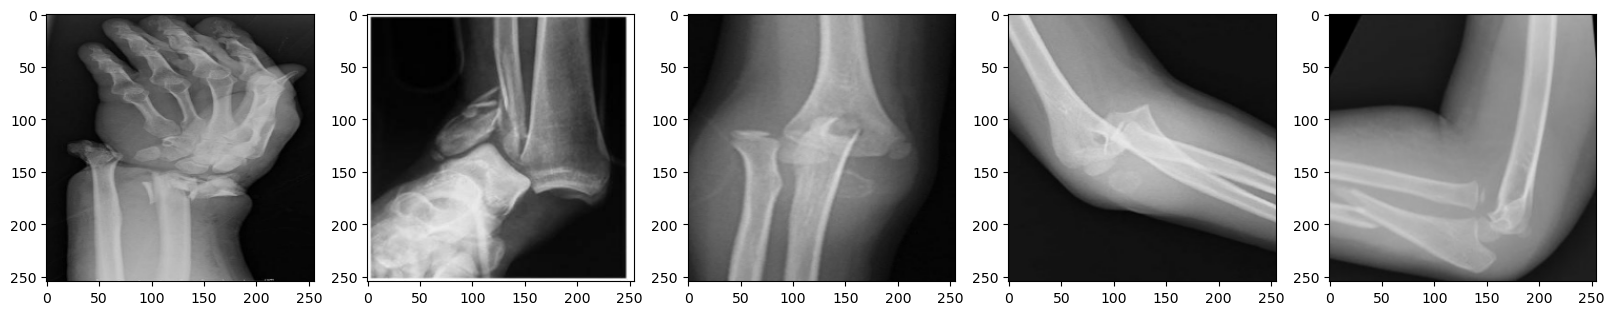

In [5]:
data = list(list(training_dataset.as_numpy_iterator())[0][0])

fig = plt.subplots(ncols=5, figsize=(20, 20))[1]
for index, image in enumerate(data[:5]):
  fig[index].imshow(image.astype(int))

# 3.1 Normalizing the 30 extracted images

## 3.1.1 Normalizing Training data

In [6]:
def normalize(image, label):
  return tf.cast(image, tf.float32)/255.0, label

training_dataset_normalized = training_dataset.map(normalize)

## 3.1.2 Normalizing validation data

In [7]:
def normalize(image, label):
  return tf.cast(image, tf.float32)/255.0, label

validation_dataset_normalized = validation_dataset.map(normalize)

# 4. Saving the Preprocessed images to be Annotated

In [8]:
os.chdir(original_cwd)
try:
  os.mkdir("Preprocessed_Images")
  os.mkdir("Preprocessed_Images\\train")
  os.mkdir("Preprocessed_Images\\test")
except FileExistsError:
  print("Directories already exists")

Directories already exists


In [9]:
os.chdir(original_cwd)
def save_images(image, folder_name):
  image_number = len(os.listdir(f"Preprocessed_images\\{folder_name}")) + 1
  out_put_dir = f"Preprocessed_images\\{folder_name}\\dislocatio_{image_number}.jpg"
  tf.keras.utils.save_img(
        out_put_dir,
        image,
        data_format=None, file_format=None, scale=True
    )

training_data = list(training_dataset_normalized.as_numpy_iterator())[0][0]
testing_data = list(validation_dataset_normalized.as_numpy_iterator())[0][0]

dataset_list = [training_data, testing_data]
folder_names = ["train", "test"]

if not len(os.listdir("Preprocessed_images\\train")) and not len(os.listdir("Preprocessed_images\\test")):
  for index, data in enumerate(dataset_list):
    for image in data:
      save_images(image, folder_names[index])
else:
  print("Preprocessed Images already saved")

Preprocessed Images already saved


# 5. Excracting annotations from the json file, which was created by roboflow tool for annotation For Visualization

In [10]:
os.chdir(original_cwd)
with open('Bone_Dislocation_Identification.v1i.coco\\train\\_annotations.coco.json') as jsonfile:
    data = json.load(jsonfile)

bounding_boxes = data['annotations']
images = data['images']

# 5. Visualizing the Images alongside their bounding boxes

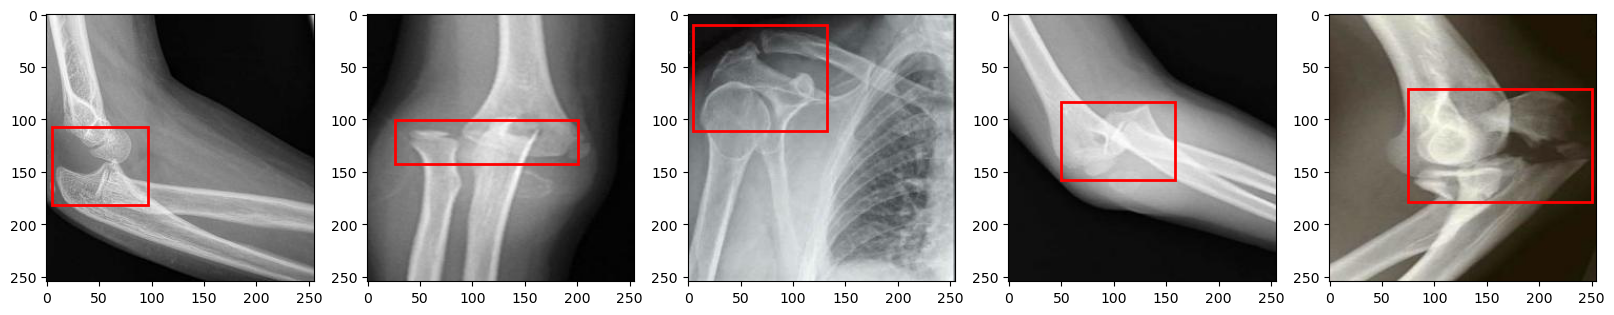

In [11]:
os.chdir(original_cwd)
fig = plt.subplots(ncols=5, figsize=(20, 20))[1]

for bounding_box, image in zip(bounding_boxes, images[:5]):
  image_path = os.path.join('Bone_Dislocation_Identification.v1i.coco\\train', image['file_name'])
  image = np.array(Image.open(image_path))
  fig[bounding_boxes.index(bounding_box)].imshow(image)
  bbox = bounding_box['bbox']
  rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
  fig[bounding_boxes.index(bounding_box)].add_patch(rect)